In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd
import numpy as np


In [4]:
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target

In [5]:
iris_data.shape

(150, 4)

In [6]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_target.shape

(150,)

In [8]:
type(iris_data)

numpy.ndarray

In [9]:
type(iris_target)
print(type(iris_data))
iris_target

<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Step 1:** Let's now convert the numpy array into dataframes


In [10]:
# Convert data into pandas dataframes (Method 1)
df = pd.DataFrame(iris_data, columns=[iris.feature_names[0], iris.feature_names[1], iris.feature_names[2], iris.feature_names[3]])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# Using a for loop for creation of dataframes (Method 2)
column_names = iris.feature_names
df1 = pd.DataFrame()
for i, column_name in enumerate(column_names):
    df1[column_name] = iris_data[:, i]
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Step 2:** Add the column of targets on the right (As numpy array)


In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
targets = iris.target_names
print(targets)

['setosa' 'versicolor' 'virginica']


In [14]:

targets[0] # run this cell before running next
len(targets)
len(iris_target)

df2 = pd.DataFrame({'Target (Species)': iris.target})
df2


,Target (Species)
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [15]:
df3 = pd.DataFrame()
df3 = df2.copy()
mapping = {0: targets[0], 1: targets[1], 2: targets[2]}
df3['Target (Species)'] = df3['Target (Species)'].map(mapping)
df3

,Target (Species)
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [16]:
# newdf = df1.merge(df2, how='right')
result = pd.concat([df1, df2], axis=1)
result

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target (Species)
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
result.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target (Species)   150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


<Axes: >

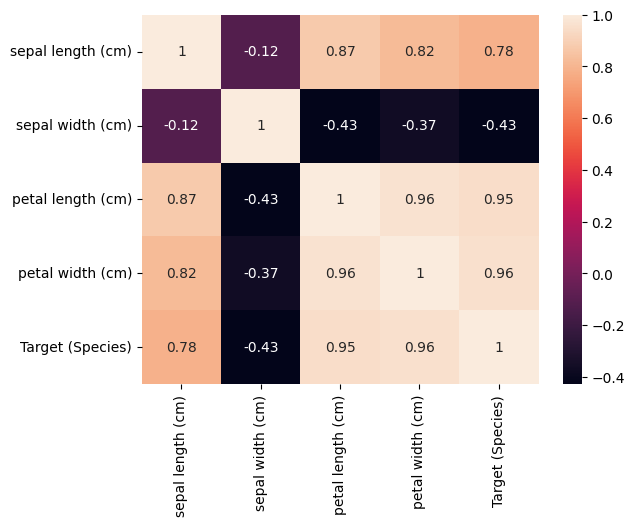

In [22]:
corr = result.corr()
sns.heatmap(corr, annot= True)

In [46]:
x1 = result[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']]
x2 = result[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']]


In [29]:
x1.shape

(150, 3)

In [30]:
y1 = result['Target (Species)']

In [35]:
y1.shape
y1 = np.array(y1).reshape(-1,1)
y1.shape

(150, 1)

In [36]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size=0.2, random_state=5)

In [61]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y1, test_size=0.3, random_state=42)

In [62]:
model1 = DecisionTreeClassifier(criterion='entropy')
model2 = DecisionTreeClassifier(criterion='entropy')



In [63]:
model1.fit(xtrain1, ytrain1)
model2.fit(xtrain2, ytrain2)

DecisionTreeClassifier(criterion='entropy')

In [64]:
ypred1 = model1.predict(xtest1)
ypred2 = model2.predict(xtest2)

In [65]:
accuracy = accuracy_score(ytest1, ypred1)
accuracy1 = accuracy_score(ytest2, ypred2)

In [66]:
print("Accuracy : ", accuracy)
print("Accuracy1 : ", accuracy1)

Accuracy :  0.9
Accuracy1 :  0.9777777777777777


In [69]:
conf_matrix = confusion_matrix(ytest2, ypred2)
conf_matrix1 = confusion_matrix(ytest1, ypred1)

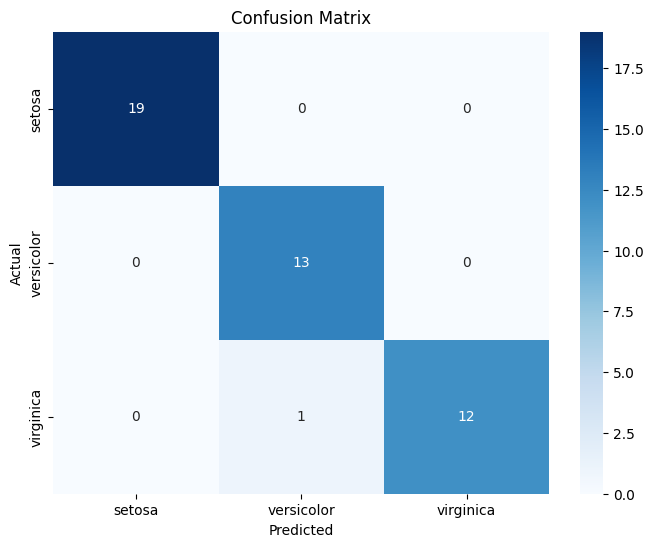

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

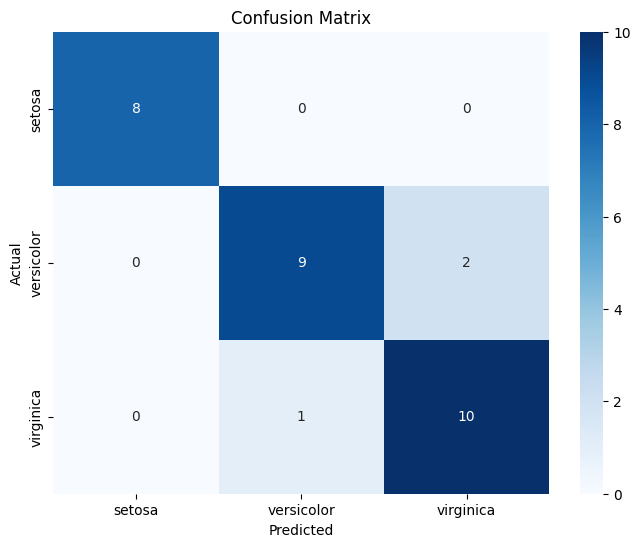

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues",
xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()